In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('dataset_2.csv')
df.rename( columns=  {
    'Hours_Studied' : 'study',
    'Attendance_Rate' : 'attendance',
    'Sleep_Hours' : 'sleep',
    'Practice_Tests_Taken': 'tests',
    'Exam_Score' : 'score'
}, inplace=True)
df.head()

,study,attendance,sleep,tests,score
0,49.239541,38.900408,71.086926,56.500063,201.988671
1,12.333361,6.697710,38.211209,31.257131,78.852031
2,59.469623,43.445831,45.317603,26.955994,190.393246
3,49.179015,37.438894,10.141542,46.486764,127.272959
4,47.833102,39.929283,33.650535,38.658658,154.722889


In [4]:
x = df[['study', 'attendance', 'sleep', 'tests']].values.reshape(-1,4)
y = df['score'].values.reshape(-1,1)

sc = MinMaxScaler()
x_norm = sc.fit_transform(x)
jb.dump(sc, 'scaler_2.pkl')
yn = y.min()
yx = y.max()
y = (y-yn)/(yx - yn)

In [5]:
def score(study, attendance, sleep, tests) :
    model_path = 'two.keras'
    sc = jb.load('scaler_2.pkl')
    inp = np.array([[study, attendance, sleep, tests]])
    inp = sc.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(4,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        hist = model.fit(x_norm, y, epochs=500)
        lv = hist.history['loss']
        pred = model.predict(x)
        model.save('two.keras')
        plt.figure()
        plt.plot(lv)
        plt.title('loss values')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.scatter(y, pred, label='actual vs predicted', color='pink')
        plt.title('Actual vs Predicted')
        plt.grid(True)
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.legend()
        plt.show()
    return model.predict(inp)[0][0]*(yx-yn)+yn

Epoch 1/500


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0900
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0568
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0403
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0366
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0317 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0193
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0141
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0112
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0102
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0076
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0059
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0054
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0043
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0034
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028
Epoch 16/500
4/4 ━━━━━━━━━━━━━━

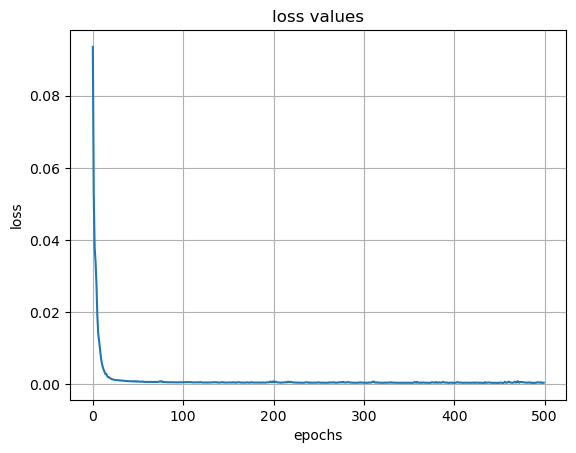

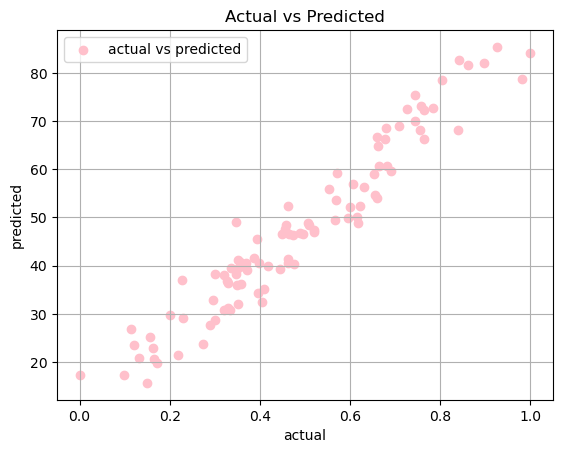

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
144.87668898271372
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
191.10735069132414
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
356.6139880956083


In [6]:
print(score(44.88, 42.89, 35.38, 60.84))
print(score(55.36, 25.38, 12.86, 71.72))
print(score(86.58, 29.49, 51.45, 123.22))